# 👩‍🎨 Animate with SCIMAP!

The goal is to produce an animation that illustrates the transition from a UMAP plot to an XY coordinate plot within spatial data.

In [1]:
# import packages
import scimap as sm
import anndata as ad

Running SCIMAP  1.3.8


In [2]:
# Load the data that we saved in the last tutorial (with ROIs added)
adata = ad.read_h5ad('/Users/aj/Dropbox (Partners HealthCare)/nirmal lab/resources/exemplarData/scimapExampleData/scimapExampleData.h5ad')

To transition between physical XY coordinates and UMAP, we first require the UMAP coordinates.

## Set Up

In [3]:
adata = sm.tl.umap (adata)

/Users/aj/miniconda3/envs/scimap/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



With both coordinate systems ready, we can proceed to create the animation. However, without a compelling coloring method, the plot might still appear lackluster. A popular approach to color a plot involves using cell types. As previously demonstrated, you can employ scimap's cell phenotyping method for identifying cell types. For the sake of simplicity, let's cluster the data and color it based on those clusters.

In [4]:
adata = adata = sm.tl.cluster (adata, k= 5, method = 'kmeans', label='kmeans')

Kmeans clustering


/Users/aj/miniconda3/envs/scimap/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



### Animate


Consult the documentation to explore all available parameters within the animate function. It's important to remember that not all IDEs can render animations directly, so it's advisable to save the animation to disk for viewing. Since saving can take a considerable amount of time, optimizing the animation's appearance through data subsampling is a common practice. Additionally, keep in mind that sometimes Jupyter Notebooks may only display a still image, which can also contribute to optimization efforts.

/Users/aj/miniconda3/envs/scimap/lib/python3.10/site-packages/scimap/helpers/animate.py:241: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/aj/miniconda3/envs/scimap/lib/python3.10/site-packages/scimap/helpers/animate.py:420: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



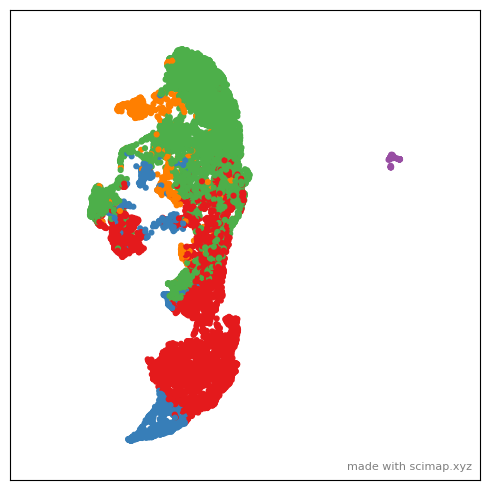

/Users/aj/miniconda3/envs/scimap/lib/python3.10/site-packages/matplotlib/animation.py:892: UserWarning:

Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.



In [5]:
sm.hl.animate (adata, color='kmeans')

Now, let's proceed to save the animation to disk. To do this, you'll need to have ImageMagick installed on your computer. Please visit the provided [link](https://imagemagick.org/script/download.php) to install it.

To save the animation on your disk, specify the path to the desired directory and the file name in the following manner: `save_animation = "/path/to/directory/my_figure"`.

/Users/aj/miniconda3/envs/scimap/lib/python3.10/site-packages/scimap/helpers/animate.py:241: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/aj/miniconda3/envs/scimap/lib/python3.10/site-packages/scimap/helpers/animate.py:420: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored

MovieWriter imagemagick unavailable; using Pillow instead.


Saving file- This can take several minutes to hours for large files


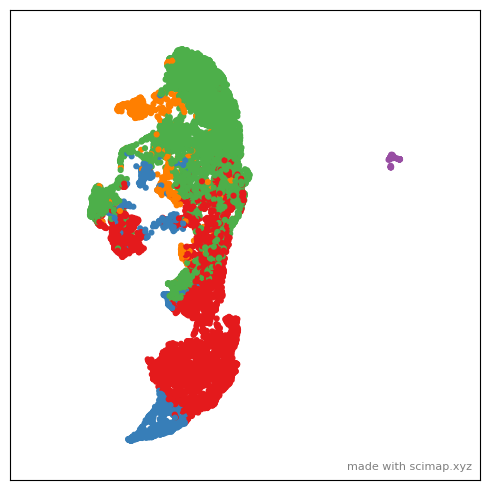

In [6]:
sm.hl.animate (adata, color='kmeans', save_animation = '/Users/aj/Dropbox (Partners HealthCare)/nirmal lab/resources/exemplarData/scimapExampleData')


You may find that the GIF images generated are quite large. Support for saving as MP4 will be added shortly, which typically helps in reducing file size. In the meantime, I often resort to using an online tool to convert the GIFs to MP4 format.

Additionally, there are several parameters you can adjust to customize the animation's appearance. For more information on these options, please refer to the documentation.

```
palette=None, 
subset=None, 
subsample=None,
use_layer=None, 
use_raw=False, 
log=False, 
n_frames=50, 
interval=50, 
reverse=True, 
final_frame=5, 
s=None, 
alpha=1, 
cmap='vlag', 
tight_layout=True, 
plot_legend=False, 
title=None, 
fontsize=20, 
pltStyle=None,
figsize=(5, 5)
```

It's important to remember that you can plot only one image at a time since the XY coordinates are typically unique to each image. When dealing with a dataset that contains multiple images, utilize the `subset` parameter to select the specific image you wish to plot. As previously advised, you can use the `subsample` parameter to refine the appearance of the plot.

Additionally, you have the option to color the plot based on the expression of a specific marker. The parameters `use_layer=None`, `use_raw=False`, and `log=False` allow you to control various aspects of this feature.

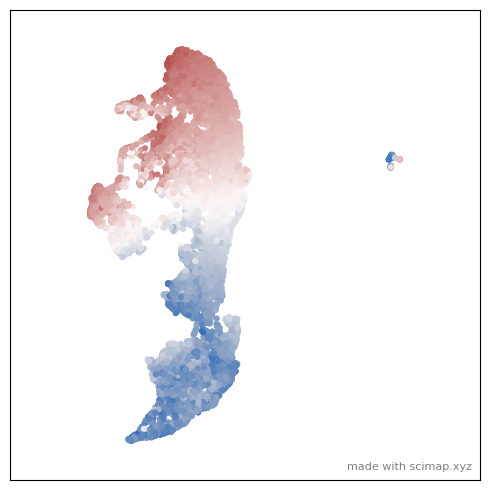

/Users/aj/miniconda3/envs/scimap/lib/python3.10/site-packages/matplotlib/animation.py:892: UserWarning:

Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.



In [7]:
sm.hl.animate (adata, color='CD45')

To adjust the smoothness and length of the animation, set `n_frames=50`, `interval=50`, `reverse=True`, and `final_frame=5`. For customizing the plot's theme or background, use the `pltStyle=None` parameter.

/Users/aj/miniconda3/envs/scimap/lib/python3.10/site-packages/scimap/helpers/animate.py:241: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/aj/miniconda3/envs/scimap/lib/python3.10/site-packages/scimap/helpers/animate.py:420: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



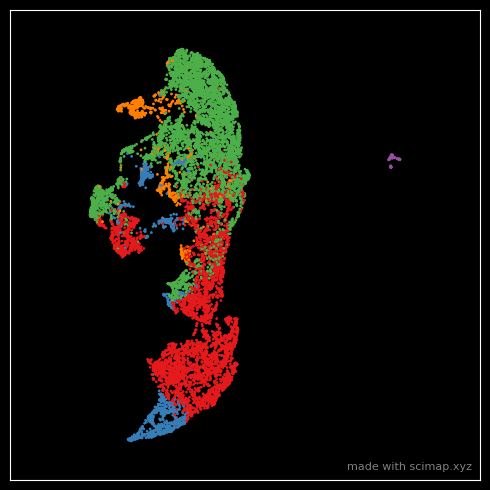

/Users/aj/miniconda3/envs/scimap/lib/python3.10/site-packages/matplotlib/animation.py:892: UserWarning:

Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.



In [8]:
sm.hl.animate (adata, color='kmeans', pltStyle='dark_background', s=1)

In the plot mentioned above, I adjusted the dot size to `s=1`. Should you still find the dots too large, consider enlarging the whole figure by setting `figsize = (25,25)`, which will effectively reduce the relative size of the points.

**Happy Animating.**

I'm excited to see what you come up with. Don't forget to tag us on [Twitter](https://twitter.com/nirmallab)!